<font size="6"> Hypothesentest: Vorzeichentest </font>

In diesem Jupyter Notebook werden wir die Hypothesen, die wir in Modul 2 formuliert haben, untersuchen.

Die Durchführung von Hypothesentests ist sehr umfangreich. Es würde den Rahmen dieser Veranstaltung sprengen, auf alle Themen und Konzepte einzugehen, die mit einem solchen Hypothesentest einhergehen. Daher sind im Folgenden Inhalte, die über den Rahmen dieser Veranstaltung hinausgehen, als **optional** gekennzeichnet. Wer sich für die Inhalte interessiert, kann hier tiefer in die Materie einsteigen. Die inhaltliche Durchdringung der optionalen Inhalte ist jedoch **nicht notwendig** für die erfolgreiche Teilnahme an dieser Veranstaltung.

**Bitte beachten** Sie, dass die enthaltenen Codezeilen ausgeführt werden müssen. Wir empfehlen Ihnen, alle Codezeilen vor der Ausführung auszuführen. Wählen Sie dazu im Menü "Cell" den Punkt "Run all".

---

Um eine wissenschaftliche Untersuchung durchzuführen, bei der Hypothesen anhand eines Tests untersucht werden, gibt es für gewöhlich einen festen Ablauf mit einzelnen Schritten, die der Reihe nach durchzuführen sind. Üblicherweise sind dies die folgenden Schritte:


  -   Formulierung der Nullhypothese und der Alternativhypothese
  -   Teststatistik wählen
  -   Signifikanzniveau festlegen
  -   Nullverteilung der Teststatistik bestimmen
  -   Annahme und Ablehnungsbereich für die Nullhypothese bestimmen
  -   Teststatistik berechnen
  -   Das Ergebnis der Studie gemäß den Vorgaben aus 3. + 5. ermitteln.

Im Folgenden möchten wir unsere aufgestellten Hypothesen nun untersuchen und werden dazu die aufgeführten Schritte durchführen und die darin vorhandenenen Begriffe erklären. Der Nachvollziehbarkeit halber weichen wir allerdings ein wenig von der üblichen Reihenfolge ab und berechnen die Teststatistik noch bevor wir uns der Nullverteilung zuwenden.
Versuchen Sie die Schritte nachzuvollziehen und ggf. soweit möglich auf Ihre eigenen Hypothesen anzuwenden.

Um unsere Hypothesen im Folgenden zu überprüfen starten wir zunächst, wie gehabt, mit dem Einlesen unserer Daten.

## Einlesen der Daten 

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

daten = pd.read_csv("UmweltLuftDaten.CSV", sep=';', header=0)

daten

,Stationscode,Datum,Uhrzeit,Feinstaub,Ozon,Stickstoffdioxid,Luftqualitätsindex,Temperatur-mean,Temperatur-min,Temperatur-max,Niederschlag,Schneefall,Windrichtung,Windgeschwindigkeit,Spitzenwindboe,Luftdruck,Sonnenminuten
0,DENW053,01.11.2020,01:00,13.0,45.0,9.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
1,DENW053,01.11.2020,02:00,13.0,33.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
2,DENW053,01.11.2020,03:00,13.0,28.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
3,DENW053,01.11.2020,04:00,13.0,41.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
4,DENW053,01.11.2020,05:00,13.0,46.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35039,DENW059,31.10.2021,21:00,6.0,51.0,9.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35040,DENW059,31.10.2021,22:00,6.0,59.0,7.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35041,DENW059,31.10.2021,23:00,6.0,45.0,NaN,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35042,DENW059,01.11.2021,24:00,6.0,39.0,9.0,sehr gut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Formulierung der Nullhypothese und der Alternativhypothese

Als erstes möchten wir uns mit der Frage befassen, ob die Tageszeit für die Feinstaubbelastung einen Unterschied macht. Die folgende Nullhypothese haben wir formuliert (Zur Erinnennurg wie Hypothesen gebildet werden siehe [Modul 2](https://moodle.ki-campus.org/mod/h5pactivity/view.php?id=6593)):

**Nullhypothese 1**: "*Es gibt keinen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht*"

Unsere Alternativhypothese lautet:

**Alternativhypothese 1**: "*Es gibt einen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht (Vermutung: tagsüber höher).*"




## Teststatistik wählen

Eine Teststatistik ist eine Kennzahl, die aus den Stichprobendaten berechnet wird, um in einem statistischen Hypothesentest eine Entscheidung zu treffen. Sie fasst die Information der Daten in einer Zahl zusammen, mit der die Hypothese bewertet wird.

Es gibt verschiedene **mögliche** Testverfahren um diese Teststatistik $S$ zu berechnen:

* Vergleich der Stichprobenmittelwerte (gepaarter t-Test),
* Zählen der Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht (Vorzeichentest),
* Berechnung ob es einen linearen Zusammenhang zwischen zwei Variablen gibt (Korrelationstest),
* &hellip;

Wir betrachten im Folgenden den Vorzeichentest und ermitteln die Anzahl&nbsp;𝑆 der Datenpaare, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht. Diesen Wert nennen wir 𝑆  (für Test**s**tatistik).

Beispiel: Am 1.11.2020 beträgt der Feinstaubwert für 7 Uhr morgens: 13&#x202f;&mu;g/m&#xB3; und um 19 Uhr Abends: 11&#x202f;&mu;g/m&#xB3;. Die Differenz zwischen Tag und Nacht beträgt also: 13 μg/m³ − 11 μg/m³ = 2 μg/m³. Dieser Wert ist positiv. Wenn wir nur ein einziges Datenpaar auswerten würden, dann wäre unser $S = 1$.

Bevor dieser Wert aber für uns eine Bedeutung haben kann, müssen wir zunächst noch einen Blick auf unsere Experimentdaten werfen. Wieviele Datenpunkte betrachten wir insgesamt?

## **Optional**: Vorbereitung der Datensätze

Um die Hypothese zu untersuchen, betrachten wir zwei Gruppen von Feinstaubwerten, nämlich die der Feinstaubbelastung am Tag und der in der Nacht.

Für den Vorzeichentest müssen wir allerdings berücksichtigen, dass paarweise zusammengehörige Daten benötigt werden. Da unsere Daten nicht natürlich paarweise vorliegen, müssen wir uns diese Paarungen entsprechend definieren. Eine naheliegende Möglichkeit ist es, Tag und Nacht entsprechend ihres Verlaufs zusammenzuführen, also 7&nbsp;Uhr morgens mit 19&nbsp;Uhr abends und so weiter. Wir führen dabei Werte des Tages mit der darauffolgenden Nacht derselben Station zusammen.

Die zu bildenden Subsets müssen also paarweise zuordbar sein.
Um diese Subsets bilden zu können, müssen wir für uns zunächst definieren, was Tag ist und was Nacht. Die Zeitintervalle müssen dabei dieselbe Länge haben, um die paarweise Zuordbarkeit zu gewährleisten.

Da es zur Definition von Tag und Nacht wohl verschiedene Meinungen gibt, versuchen wir Kernbereiche zu definieren die eindeutig Tag oder Nacht zuzuordnen sind. Im Folgenden wählen wir für den Tag den Zeitraum zwischen 7&nbsp;Uhr und 17&nbsp;Uhr und für die Nacht den Zeitraum zwischen 19&nbsp;Uhr und 5&nbsp;Uhr morgens.

### Einen Datensatz je Stationscode erstellen

In [2]:
# Falls wir verschiedene Stationscodes in den Daten haben, dann erstellen wir die Paare der Daten je Stationscode separat
daten['Stationscode'].unique()

array(['DENW053', 'DENW212', 'DENW211', 'DENW059'], dtype=object)

In [3]:
# Ein Set je Stationscode
daten_DENW053 = daten[daten['Stationscode'] == 'DENW053']
daten_DENW212 = daten[daten['Stationscode'] == 'DENW212']
daten_DENW211 = daten[daten['Stationscode'] == 'DENW211']
daten_DENW059 = daten[daten['Stationscode'] == 'DENW059']

# Die Sets nach Tag und Nacht teilen
daten_tag_DENW053 = daten_DENW053.loc[(daten_DENW053['Uhrzeit'] >= '07:00') & (daten_DENW053['Uhrzeit'] <= '17:00')]
daten_nacht_DENW053 = daten_DENW053.loc[(daten_DENW053['Uhrzeit'] >= '19:00') | (daten_DENW053['Uhrzeit'] <= '05:00')]

daten_tag_DENW212 = daten_DENW212.loc[(daten_DENW212['Uhrzeit'] >= '07:00') & (daten_DENW212['Uhrzeit'] <= '17:00')]
daten_nacht_DENW212 = daten_DENW212.loc[(daten_DENW212['Uhrzeit'] >= '19:00') | (daten_DENW212['Uhrzeit'] <= '05:00')]

daten_tag_DENW211 = daten_DENW211.loc[(daten_DENW211['Uhrzeit'] >= '07:00') & (daten_DENW211['Uhrzeit'] <= '17:00')]
daten_nacht_DENW211 = daten_DENW211.loc[(daten_DENW211['Uhrzeit'] >= '19:00') | (daten_DENW211['Uhrzeit'] <= '05:00')]

daten_tag_DENW059 = daten_DENW059.loc[(daten_DENW059['Uhrzeit'] >= '07:00') & (daten_DENW059['Uhrzeit'] <= '17:00')]
daten_nacht_DENW059 = daten_DENW059.loc[(daten_DENW059['Uhrzeit'] >= '19:00') | (daten_DENW059['Uhrzeit'] <= '05:00')]

# Die Indizes zurücksetzen, damit Python sich nicht die entstandenen Lücken merkt
daten_tag_DENW053 = daten_tag_DENW053.reset_index(drop=True)
daten_nacht_DENW053 = daten_nacht_DENW053.reset_index(drop=True)

daten_tag_DENW212 = daten_tag_DENW212.reset_index(drop=True)
daten_nacht_DENW212 = daten_nacht_DENW212.reset_index(drop=True)

daten_tag_DENW211 = daten_tag_DENW211.reset_index(drop=True)
daten_nacht_DENW211 = daten_nacht_DENW211.reset_index(drop=True)

daten_tag_DENW059 = daten_tag_DENW059.reset_index(drop=True)
daten_nacht_DENW059 = daten_nacht_DENW059.reset_index(drop=True)

### Datenpaarungen für Stationscode DENW053 erstellen

In [4]:
print(pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']}).head(n=6))

print(pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']}).tail(n=6))

    Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
0  01.11.2020       07:00  01.11.2020         01:00
1  01.11.2020       08:00  01.11.2020         02:00
2  01.11.2020       09:00  01.11.2020         03:00
3  01.11.2020       10:00  01.11.2020         04:00
4  01.11.2020       11:00  01.11.2020         05:00
5  01.11.2020       12:00  01.11.2020         19:00
       Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
4010  31.10.2021       13:00  31.10.2021         20:00
4011  31.10.2021       14:00  31.10.2021         21:00
4012  31.10.2021       15:00  31.10.2021         22:00
4013  31.10.2021       16:00  31.10.2021         23:00
4014  31.10.2021       17:00  01.11.2021         24:00
4015         NaN         NaN  01.11.2021         01:00


Da wir für jede Station alle Werte des Tages gezogen haben, startet jeder unserer Datensätze am 1.11.2020 morgens um 1:00&nbsp;Uhr. Weil diese Werte nach unserer Paarung zu den Tag Werten des vorangegangenen Tage gehören, können wir diese nicht verwenden und verwerfen die Einträge.
Ähnliches liegt am Ende eines jeden Datensatzes vor. Der von uns definierte letzte Tag endet am 31.10.2021 um 17&nbsp;Uhr. Für die Nacht enden die Werte aber bereits um 1:00&nbsp;Uhr des Folgetages. Gemäß unserer Paarung haben wir also mehr Werte des letzen Tages als von der letzten Nacht. Wir schneiden auch hier passend ab.

In [5]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW053 = daten_nacht_DENW053.drop([0,1,2,3,4], axis=0, inplace=False)

# Die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW053 = daten_tag_DENW053.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit Python sich nicht die Lücken merkt
daten_nacht_DENW053 = daten_nacht_DENW053.reset_index(drop=True)

In [6]:
pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']})


,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


Die Werte passen nun paarweise zusammen. Da für die anderen Stationscodes der exakt selbe Zeitraum vorliegt, kann hier genau dasselbe Vorgehen angewendet werden.

### Datenpaarungen für Stationscode DENW212 erstellen

In [7]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW212 = daten_nacht_DENW212.drop([0,1,2,3,4], axis=0, inplace=False)

# Die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW212 = daten_tag_DENW212.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit Python sich nicht die Lücken merkt
daten_nacht_DENW212 = daten_nacht_DENW212.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW212['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW212['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW212['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW212['Uhrzeit']})

,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


### Datenpaarungen für Stationscode DENW211 erstellen



In [8]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW211 = daten_nacht_DENW211.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW211 = daten_tag_DENW211.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit python sich nicht die Lücken merkt
daten_nacht_DENW211 = daten_nacht_DENW211.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW211['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW211['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW211['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW211['Uhrzeit']})

,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


### Datenpaarungen für Stationscode DENW059 erstellen

In [9]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW059 = daten_nacht_DENW059.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW059 = daten_tag_DENW059.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit python sich nicht die Lücken merkt
daten_nacht_DENW059 = daten_nacht_DENW059.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW059['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW059['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW059['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW059['Uhrzeit']})

,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


### Die Datensätze wieder zu einem Gesamt-Datensatz zusammensetzen:

In [10]:
# Je Stationscode ein DataFrame erstellen mit einer Spalte: Feinstaubwerte am Tag und einer Spalte: Feinstaubwerte in der Nacht
daten_DENW053 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW053['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW053['Feinstaub']})

daten_DENW212 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW212['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW212['Feinstaub']})

daten_DENW211 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW211['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW211['Feinstaub']})

daten_DENW059 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW059['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW059['Feinstaub']})

# Die vier einzelnen Tabellen zu einer Gesamttabelle mit zwei Spalten zusammen fügen
daten_gesamt = pd.concat([daten_DENW053, daten_DENW212, daten_DENW211, daten_DENW059], axis=0)

# Wir fixen die Zeilennummerierung
daten_gesamt.reset_index(drop=True, inplace=True)
daten_gesamt

,Feinstaub_Tag,Feinstaub_Nacht
0,13.0,11.0
1,13.0,10.0
2,13.0,10.0
3,13.0,10.0
4,13.0,10.0
...,...,...
16039,9.0,6.0
16040,8.0,6.0
16041,8.0,6.0
16042,8.0,6.0


Wir haben jetzt den benötigten Datensatz mit einer Spalte Feinstaubwerte am Tag und einer Spalte Feinstaubwerte in der Nacht so in der Tabelle abgelegt, dass die paarweise zusammengehörigen Werte jeweils in derselben Zeile liegen.

## Unsere Experimentdaten

Nach der Vorbereitung der Daten erhalten wir unsere Experimentdaten. Diese sind im DataFrame `daten_gesamt` abgelegt und umfassen $16044$ Datenpaare mit Feinstaubwerten für den Tag und die Nacht:

In [11]:
daten_gesamt

,Feinstaub_Tag,Feinstaub_Nacht
0,13.0,11.0
1,13.0,10.0
2,13.0,10.0
3,13.0,10.0
4,13.0,10.0
...,...,...
16039,9.0,6.0
16040,8.0,6.0
16041,8.0,6.0
16042,8.0,6.0


## Signifikanzniveau festlegen

Mit einem Hypothesentest kann die Nullhypothese nie mit 100 %iger Sicherheit verworfen oder bestätigt werden. Es besteht immer eine Irrtumswahrscheinlichkeit. Das liegt daran, dass für die Analyse immer eine Stichprobe aus der Grundgesamtheit gezogen wird.

Wir haben unsere Stichprobe so festgelegt, dass wir die stündlichen Werte von vier Kölner Messstationen über den Zeitraum eines Jahres betrachten. Eine andere Stichprobe (z. B. ein anderes Jahr oder eine andere Messstation) liefert vielleicht andere Ergebnisse. Daher ist jede Aussage über eine Hypothese immer mit einer Irrtumswahrscheinlichkeit behaftet.

Diese Irrtumswahrscheinlichkeit wird als Signifikanzniveau ($α$) bezeichnet.
Das **Signifikanzniveau** wird immer vor der Analyse festgelegt. Es liegt häufig zwischen 1&#8239;% und 5&#8239;%. Bei einem Signifikanzniveau von 5&#8239;% ($α=0,05$) besteht ein Risiko von 5&#8239;%, dass die Nullhypothese verworfen wird, obwohl sie eigentlich wahr ist.

Für diese Untersuchung legen wir das Signifikanzniveau auf $α=0,05$.

## Teststatistik berechnen

Unsere Teststatistik $S$ haben wir uns zuvor definiert als: die Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht. Wir berechnen zunächst die Differenz zwischen den Tag- und Nachtwerten:

In [12]:
daten_gesamt['Feinstaub_Differenz'] = daten_gesamt['Feinstaub_Tag'] - daten_gesamt['Feinstaub_Nacht']

daten_gesamt.head(n=10)

,Feinstaub_Tag,Feinstaub_Nacht,Feinstaub_Differenz
0,13.0,11.0,2.0
1,13.0,10.0,3.0
2,13.0,10.0,3.0
3,13.0,10.0,3.0
4,13.0,10.0,3.0
5,12.0,10.0,2.0
6,12.0,10.0,2.0
7,12.0,10.0,2.0
8,12.0,10.0,2.0
9,12.0,9.0,3.0


Nun können wir die Anzahl $S$ der positiven Differenzen zählen:

In [13]:
# Zähle, wie oft die Differenz positiv ist
positiv = (daten_gesamt['Feinstaub_Differenz'] > 0).sum()
negativ = (daten_gesamt['Feinstaub_Differenz'] < 0).sum()
null = (daten_gesamt['Feinstaub_Differenz'] == 0).sum()

# Ausgabe der Ergebnisse
print(f"Bei {positiv} Datenpaaren ist die Feinstaubbelastung am Tag größer als in der Nacht.")
print(f"Bei {null} Datenpaaren ist die Feinstaubbelastung am Tag gleich der in der Nacht.")
print(f"Bei {negativ} Datenpaaren ist die Feinstaubbelastung am Tag kleiner als in der Nacht.")

print(positiv + negativ)

Bei 6772 Datenpaaren ist die Feinstaubbelastung am Tag größer als in der Nacht.
Bei 2168 Datenpaaren ist die Feinstaubbelastung am Tag gleich der in der Nacht.
Bei 6833 Datenpaaren ist die Feinstaubbelastung am Tag kleiner als in der Nacht.
13605


Unsere Betrachtung enthält drei Fälle: positive Differenz, negative Differenz, keine Differenz (die Feinstaubbelastung am Tag und in der Nacht sind gleich). Der Test, den wir verwenden, bzw. die dem Test zugrunde liegende Wahrscheinlichkeitsverteilung, berücksichtigt aber nur zwei Ergebnisse (Erfolg / Misserfolg).
Um den Test durchführen zu können, muss also zunächst noch einmal überlegt werden, wie mit den Nulldifferenzen verfahren wird. Wir können beispielsweise die Nullen gleich auf beide Ergebnisse verteilen oder die Nullen für diesen Test außen vor zu lassen.

Im Folgenden lassen wir die Differenzen die Null ergaben außen vor und betrachten somit $6772$ positive und $6833$ negative,  also insgesamt $13605$&nbsp;Fälle.

Nun liegt uns die Teststatistik $S$, die Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht, vor:

**$S = 6772$**

## Erste Betrachtung des Ergebnisses

Unsere reduzierten Experimentdaten umfassen $13605$ Datenpaare. Davon sind bei $6 772$&nbsp;Datenpaaren die Werte für den Tag größer als für die Nacht (positive Differenz) und bei $6 833$ Datenpaaren sind die Werte in der Nacht größer (negative Differenz). Damit erhalten wir für unsere Teststatistik den Wert: $S=6 772$, die Anzahl der positiven Differenzen.

Die positiven Differenzen könnten jetzt durch natürliche Schwankungen zu erklären sein (Zufall) oder dadurch, dass es doch einen Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht gibt.

Wir müssen nun herausfinden, ob der von uns ermittelte Wert $S$ auf Zufall zurückzuführen ist (und wir die Nullhypothese nicht verwerfen können) oder ob dieser Wert ausreicht, um zu belegen, dass es einen Unterschied zwischen der Feinstaubbelastug am Tag und in der Nacht gibt. Dabei hilft uns die Nullverteilung. 

## Nullverteilung der Teststatistik bestimmen

Die Nullverteilung zeigt, wie wahrscheinlich das Auftreten eines bestimmten Wertes für $S$ ist, unter der Annahme, dass die Nullhypothese wahr ist. Die Nullverteilung ist eine Wahrscheinlichkeitsverteilung.

Die Nullverteilung des Vorzeichentests folgt einer **[Binomialverteilung](https://de.wikipedia.org/wiki/Bernoulli-Verteilung)**, da der Vorzeichentest im Wesentlichen auf dem Zählen von Erfolgen (positiven Differenzen) und Misserfolgen (negativen Differenzen) basiert, die zwei mögliche Ergebnisse darstellen – genau so wie bei einem binomialen Zufallsexperiment.

Die Binomialverteilung beschreibt die Wahrscheinlichkeiten für die Anzahl der Erfolge in einer Serie von gleichartigen Experimenten, die nur zwei mögliche Ergebnisse haben. Man nennt diese Art von Experimenten auch Binomisches Zufallsexperiment (oder Bernoulli Experiment).

Hier eine Darstellung von möglichen Binomialverteilungen.

<img width="700" alt="Binomial distribution pmf" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Binomial_distribution_pmf.svg/700px-Binomial_distribution_pmf.svg.png?20220403135056"> 

<a href="https://commons.wikimedia.org/wiki/File:Binomial_distribution_pmf.svg">Tayste</a>, Public domain, via Wikimedia Commons

### **Optional**: Binomialverteilung (Hintergrund & Erklärung)

Dies sind die Eigenschaften eines Binomischen Zufallsexperiments wie bspw. dem Münzwurf:

*   **Anzahl der Versuche**: Man führt ein Experiment **n**-mal durch (z. B. man wirft  10-mal eine Münze).
*   **Zwei mögliche Ergebnisse**: Bei jedem Experiment gibt es **nur zwei mögliche Ergebnisse**: Erfolg oder Misserfolg (z. B. Kopf oder Zahl bei einer Münze). Der Erfolg muss nicht unbedingt „gut“ sein; es geht nur darum, ein bestimmtes Ergebnis zu zählen.
*   **Wahrscheinlichkeit eines Erfolgs**: Die Wahrscheinlichkeit eines Erfolgs bei jedem einzelnen Versuch ist immer dieselbe (z. B. bei einer fairen Münze liegt die Wahrscheinlichkeit Zahl zu werfen bei 50 % für Kopf).
*   **Zählung der Erfolge**: Die Binomialverteilung sagt dir, wie wahrscheinlich es ist, dass du in diesen n Versuchen genau $k$&nbsp;Erfolge erzielst (z. B. wie wahrscheinlich es ist, bei zehn Münzwürfen genau 7-mal Kopf zu bekommen).

Die Wahrscheinlichkeit, genau $k$&nbsp;Erfolge in $n$&nbsp; Versuchen zu bekommen, wird durch die Binomialformel berechnet.

Wer sich weiter in die Binomialverteilung einlesen möchte kann dies hier tun:
*   https://de.wikipedia.org/wiki/Binomialverteilung
*   https://studyflix.de/statistik/binomialverteilung-1118


Anschaulich lässt sich die Binomialverteilung anhand eines Galtonbetretts herleiten. Das Galtonbrett gleicht dabei einem Kugelspiel, bei dem man die Kugel oben in das Spiel wirft. Das Spiel hat **n**&nbsp;Ebenen mit **n**&nbsp;Hindernissen (wie bspw. einen Nagel), auf den die Kugel stößt und daraufhin mit einer Wahrscheinlichkeit von 50 % nach rechts bzw. nach links fällt.
Betrachtet man alle möglichen Wege, die die Kugel dabei nehmen kann, dann kann man hieraus auch die Wahrscheinlichkeit ableiten, mit der ein bestimmtes 𝑆 (die Kugel fällt nach rechts) auftritt.

Das Galtonbrett ist eine sehr anschauliche Methode, die Binomialverteilung zu erklären. Wer mehr zum Galtonbrett lesen möchte, kann dies hier tun:
*   https://de.wikipedia.org/wiki/Galtonbrett



### **Optional**: Binomialverteilung am kleinen Beispiel

Um diese Verteilung besser verstehen zu können, schauen wir uns zunächst die Binomialverteilung für $p=0{,}5$ und $n=10$ an. Dies entspräche für unser Experiment der Fragestellung: Wir vergleichen zehn Datenpaare der Feinstaubbelastung unter der Annahme, dass es keinen Unterschied in der Feinstaubbelastung am Tag und in der Nacht gibt: wie wahrscheinlich ist es, dass die Differenz $k$-mal oder öfter positiv ist?

Der folgende Code berechnet uns die zugehörige Binomialverteilung und erstellt einen Plot der berechneten Wahrscheinlichkeiten:

[0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]


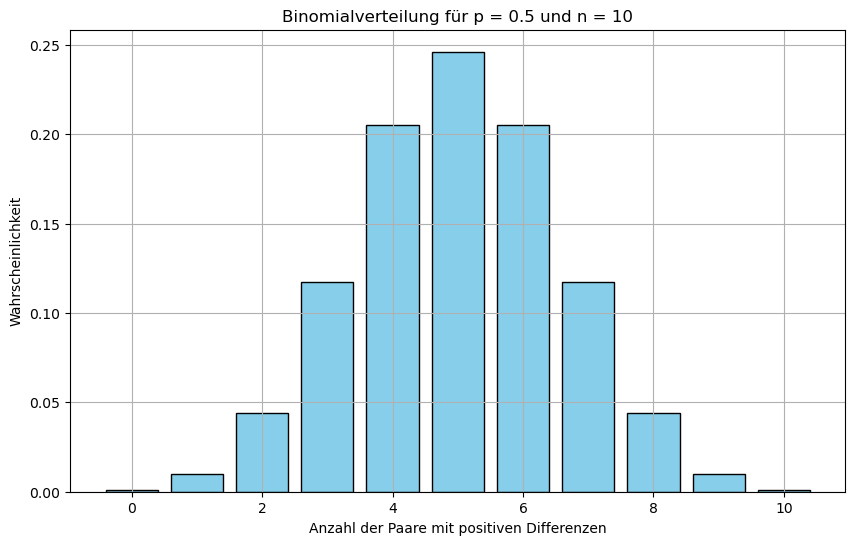

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter der Binomialverteilung
n = 10  # Anzahl der Versuche
wkeit = 0.5    # Wahrscheinlichkeit für Erfolg

# Welche möglichen Ergebnisse kann das Experiment haben?
# Erstelle einen Vektor mit den Werten von 0 bis 10
S = np.arange(0, n+1)

# Berechnung der Binomialverteilung
# Wie zuvor beschrieben ist die Binomialverteilung über eine Formel berechenbar.
# Die Funktion pmf im scipy.stats Paket berechnet die Wahrscheinlichkeiten für
# die verschiedenen Werte, die S annehmen könnte unter Angabe der
# Anzahl Versuche (n) und der Wahrscheinlichkeit (wkeit) für einen Erfolg.
binom_dist_klein = binom.pmf(S, n, wkeit)

print(binom_dist_klein)

# Die folgenden Zeilen erstellen den Plot, der die Wahrscheinlichkeiten für das
# Auftreten eines bestimmten Wertes für S zeigt.
plt.figure(figsize=(10, 6))
plt.bar(S, binom_dist_klein, width=0.8, color='skyblue', edgecolor='black')
plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.show()

Der Plot zeigt, mit welcher Wahrscheinlichkeit bei unserem Experiment ein bestimmter Wert für $S$ herauskommt &nbsp; unter der Annahme, dass die Nullhypothese gilt.

Für unser Mini-Experiment, bei dem wir nur zehn Datenpaare betrachten, gibt es elf mögliche Werte, die unser $S$ annehmen kann: $0, 1, 2, \ldots, 10$.
Wenn die Nullhypthese zutrifft, dann sind Ergebnisse für $S$ von etwa $4$, $5$ oder $6$ am wahrscheinlichsten. Abweichungen zu den Randbereichen in beiden Richtungen sind unwahrscheinlicher.

In [15]:
# Die zugehörigen Werte sind in dem array 'binom_dist_klein' hinterlegt.
# Wir lassen uns die dargestellten Werte ausgeben:

print("  S    Wahrscheinlichkeit")
print("------------")
for i, wkeit in enumerate(binom_dist_klein):
    # Gib i zweistellig aus und die Wahrscheinlichkeitswerte mit 6 Stellen
    # vor und 2 nach dem Komma
    print(f"{i:2} {wkeit*100:6.2f} %")

  S    Wahrscheinlichkeit
------------
 0   0.10 %
 1   0.98 %
 2   4.39 %
 3  11.72 %
 4  20.51 %
 5  24.61 %
 6  20.51 %
 7  11.72 %
 8   4.39 %
 9   0.98 %
10   0.10 %


Mithilfe der Binomialverteilung lässt sich sagen, mit welcher Wahrscheinlichkeit ein bestimmtes $S$ erwartet werden kann. In der vorangegangenen Ausgabe sind die Wahrscheinlichkeiten für alle möglichen Werte, die $S$ annehmen könnte, aufgelistet. Die Summe dieser Wahrscheinlichkeiten ist immer&nbsp;1 (sicheres Ereignis).

Angenommen die Frage lautet:  Wie wahrscheinlich ist es, dass die Differenz in 8 oder mehr Fällen positiv ist? Dann erhalten wir die Antwort durch die Aufsummierung der letzten drei Balken:

Die Werte sind: $0{,}0439 + 0{,}0098 + 0{,}001 = 0{,}0547$; und das entspricht einer Wahrscheinlichkeit von 5,47 %, dass, &mdash; wenn die Nullhypothese zutrifft, &mdash; ein $S$ von 8 oder größer auftritt.

### Nullverteilung der Teststatistik bestimmen

Im Falle unseres Experimentes betrachten wir $13.605$ Datenpaaren. Die Nullverteilung liegt der Annahme zugrunde, dass die Nullhypothese stimmt. Das bedeutet, dass positive und negative Vorzeichen bei der Differenzbildung nur dem Zufall zuzuschreiben sind, und wir also mit gleicher Wahrscheinlichkeit positive wie negative Vorzeichen erwarten (Wahrscheinlichkeit $p = 0{,}5$).

Der folgende Code generiert die Binomialverteilung für unser Experiment:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter der Binomialverteilung
n = positiv + negativ  # Anzahl der Versuche
wkeit = 0.5    # Wahrscheinlichkeit für Erfolg

# Welche möglichen Ergebnisse kann das Experiment haben?
# Erstelle einen Vektor mit den Werten von 0 bis 16044
x = np.arange(0, n + 1)

# Berechnung der Binomialverteilung
# Wie zuvor beschrieben ist die Binomialverteilung über eine Formel berechenbar.
# Die Funktion pmf im scipy.stats Paket berechnet die Wahrscheinlichkeiten für
# die verschiedenen Werte, die S annehmen könnte unter Angabe der
# Anzahl Versuche (n) und der Wahrscheinlichkeit (wkeit) für einen Erfolg.
binom_dist = binom.pmf(x, n, wkeit)

/Users/elisabeth/anaconda3/lib/python3.11/site-packages/scipy/stats/_discrete_distns.py:77: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


### Nullverteilung plotten

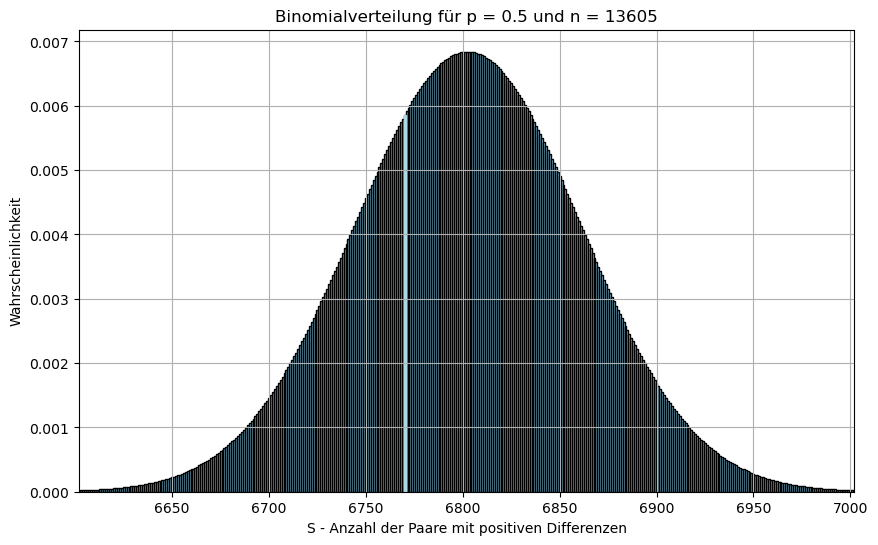

In [17]:
# Plot des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(x, binom_dist, width=1.0, color='skyblue', edgecolor='black')

# Den Balken bei Index 6770 rot markieren
plt.bar(x[6770], binom_dist[6770], width=1.0, color='lightblue', edgecolor='lightblue')

plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')

# Wir zoomen auf den mittleren Bereichs des Plots, da die Wahrscheinlichkeiten
# weiter ausserhalb aufgrund der sehr großen Datenmengen sehr schnell sehr klein werden.
# Die folgende Zeile auskommentieren um den gesamten Plot zu sehen:
plt.xlim(n//2 - 200, n//2 + 200)

# Mit der folgenden Zeile kann man den angezeigten Bereich der Y-Achse festlegen
#plt.ylim(0, 0.00000025)

plt.grid(True)
plt.show()

Der Plot zeigt die Nullverteilung der Teststatistik. Die Wahrscheinlichkeit für ein $S$ von 6770 ist im Plot hellblau markiert.

## Annahme und Ablehungsbereich für die Nullhypothese bestimmen

Mit der Festlegung des Signifikanzniveaus auf $α=0{,}05$ sagen wir, dass wir einen Unterschied in der Feinstaubbelastung zwischen Tag und Nacht annehmen (also die Nullhypothese verwerfen), wenn die Wahrscheinlichkeit für einen reinen Zufallsbefund kleiner als das Signifikanzniveau, also z. B. 5 % ist.

Für welche Werte von 𝑆 trifft das zu?

### **Optional**: Annahme und Ablehnungsbereich am kleinen Beispiel

Wir schauen uns zunächst noch einmal unser stark reduziertes Problem an, in dem wir nur 10 Datenpunkte betrachten. Im Abschnitt "Binomialverteilung am kleinen Beispiel" haben wir die Wahrscheinlichkeiten für die verschiedenen Werte die $S$ in diesem Fall annehmen kann, bereits bestimmt. Sie sind in der Variable `binom_dist_klein` hinterlegt.

Unser Signifikanzniveau haben wir auf $\alpha = 0{,}05$ (5 Prozent) festgelegt.

Mit diesem Wissen können wir nun unsere zuletzt formulierte Frage beantworten.
Die Nullhypothese wird abgelehnt, wenn unser Experiment einen Wert für $S$ erzielt, bei dem gilt, dass die Wahrscheinlichkeit einen solchen oder extremeren Wert zu erzielen, kleiner als 5 % ist.

Wir summieren die Werte vom Rand her auf, um zu schauen wie weit wir gehen können, bevor wir die 5 % überschreiten. Achtung: Wir müssen beide Randbereiche berücksichtigen.

In [18]:
# Wir betrachten die beiden Falle, dass S=0 oder dass S=10 ist.
# Die Summe der Wahrscheinlichkeiten für diese beiden Fälle
# können wir wie folgt berechnen:
wkeit_0_10 = binom_dist_klein[0] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S=0 oder S=10 ist beträgt: {wkeit_0_10}")

# Bei 0 und 10 sind wir eindeutig noch im Ablehnungsbreich. Wir nehmen noch
# die Wahrscheinlichkeiten für 1 und 9 mit auf:
wkeit_0_1_9_10 = binom_dist_klein[0] + binom_dist_klein[1] + binom_dist_klein[9] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S <= 1 oder S>=9 ist beträgt: {wkeit_0_1_9_10}")

# Auch damit sind wir noch im Ablehnungsbereich. Wir nehmen noch die 2 und
# die 8 hinzu:
wkeit_0_1_2_8_9_10 = binom_dist_klein[0] + binom_dist_klein[1] + binom_dist_klein[2] + binom_dist_klein[8] + binom_dist_klein[9] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S<=2 oder S>=8 ist beträgt: {wkeit_0_1_2_8_9_10}")

print("\nHier haben wir die 5 % eindeutig überschritten. Wir wissen jetzt, \ndass wir unsere Nullhypothese in diesem Fall ablehnen, wenn wir \nein S aus {0,1,9,10} erhalten.")

Die Wahrscheinlichkeit, das S=0 oder S=10 ist beträgt: 0.001953125
Die Wahrscheinlichkeit, das S <= 1 oder S>=9 ist beträgt: 0.021484375000000017
Die Wahrscheinlichkeit, das S<=2 oder S>=8 ist beträgt: 0.1093750000000001

Hier haben wir die 5 % eindeutig überschritten. Wir wissen jetzt, 
dass wir unsere Nullhypothese in diesem Fall ablehnen, wenn wir 
ein S aus {0,1,9,10} erhalten.


So sieht es aus, wenn wir die Summen von Hand berechnen. Bei großen Experimenten verwenden wir stattdessen eine Funktion, die uns die kumulierten Summen berechnet:

In [19]:
# Das Paket numpy hat die Funktion cumsum, die die Beträge kumuliert:
binom_dist_cumsum = np.cumsum(binom_dist_klein)

# Wir lassen uns die berechneten Werte ausgeben:

print("  S    Kumulierte Wahrscheinlichkeit")
print("------------")
for i, summe in enumerate(binom_dist_cumsum):
    # Gib i zweistellig aus und die Wahrscheinlichkeitswerte mit 6 Stellen
    # vor und 2 nach dem Komma
    print(f"{i:2} {summe*100:6.2f} %")

  S    Kumulierte Wahrscheinlichkeit
------------
 0   0.10 %
 1   1.07 %
 2   5.47 %
 3  17.19 %
 4  37.70 %
 5  62.30 %
 6  82.81 %
 7  94.53 %
 8  98.93 %
 9  99.90 %
10 100.00 %


Hier können wir jetzt direkt ablesen, dass bei $S = 2$ die kumulierte Wahrscheinlichkeit die 2,5 % bereits überschritten hat. Da die Funktion symmetrisch ist, haben wir, zusammen mit dem oberen Randbereich, bei $S = 2$ oder $S = 8$, unsere also 5 % bereits überschritten.

Unser Ablehungsbereich ist also $S = {0, 1, 9, 10}$.
Der folgende Plot zeigt den Ablehnungsbereich für unser kleines Beispiel mit rot markierten Balken.

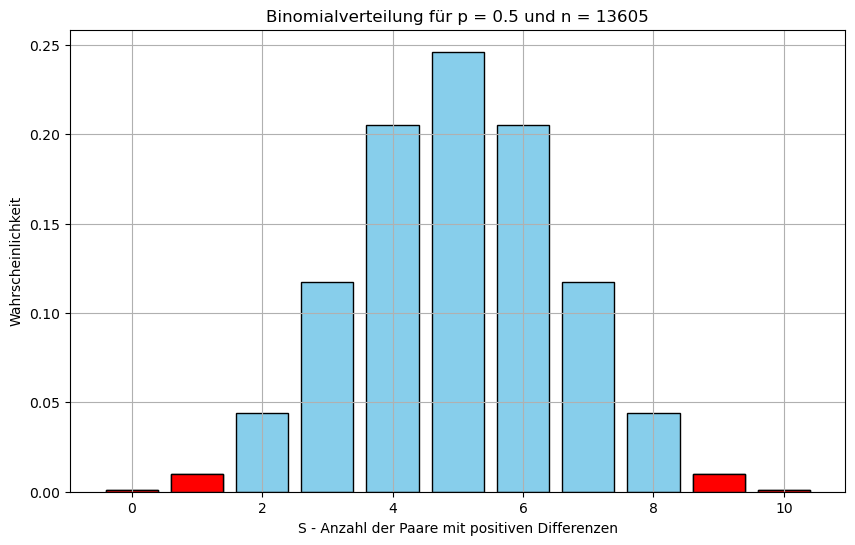

In [20]:
# Die folgenden Zeilen erstellen den Plot, der die Wahrscheinlichkeiten für das
# Auftreten eines bestimmten Wertes für S zeigt.
plt.figure(figsize=(10, 6))
plt.bar(S, binom_dist_klein, width=0.8, color='skyblue', edgecolor='black')

# Den Ablehnungsbereich rot markieren
plt.bar(x[0], binom_dist_klein[0], width=0.8, color='red', edgecolor='black')
plt.bar(x[1], binom_dist_klein[1], width=0.8, color='red', edgecolor='black')
plt.bar(x[9], binom_dist_klein[9], width=0.8, color='red', edgecolor='black')
plt.bar(x[10], binom_dist_klein[10], width=0.8, color='red', edgecolor='black')

plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.show()

### Annahme und Ablehnungsbereich bestimmen


Wir müssen die Werte vom Rand der Wahrscheinlichkeitsverteilung her aufsummieren, um zu schauen, wie weit wir gehen können, bevor wir die 5 % überschreiten, die wir als Signifikanzniveau festgelegt haben (2,5% auf der linken Seite und 2,5% auf der rechten Seite der Wahrscheinlichkeitsverteilung). Da wir hier sehr viele Werte betrachten müssen, machen wir dies nicht von Hand. Stattdessen berechen wir die kumulierten Summen direkt für alle Werte und schauen dann, an welcher Stelle wir die 2,5 % am unteren und die 97,5 % am oberen Rand der Kurve überschreiten.

In [21]:
# Das Paket numpy hat die Funktion cumsum, die die Beträge kumuliert:
binom_dist_cumsum = np.cumsum(binom_dist)

# Nun müssen wir schauen, wann die kumulierten Wahrscheinlichkeiten die 2,5 %
# überschreiten:
# Bestimmen des ersten Index, an dem der Wert größer als 0,025 ist
first_index_greater_than_0_025 = np.argmax(binom_dist_cumsum > 0.025)

print(first_index_greater_than_0_025)

last_index_smaller_than_0_975 = np.argmin(binom_dist_cumsum < 0.975)

print(last_index_smaller_than_0_975)


6688
6917


Bei $6688$ sind die 2,5% überschritten. Da die Binomialverteilung symmetrisch ist, haben wir am oberen Rand der Kurve die 2,5 % an derselben Stelle ($1 3605 - 6 688 = 6 917$) auch überschritten.

Der Ablehnungsbereich ist also der Bereich für $S=[0; 6688]~ \cup ~[6917; 13606]$.
Der folgende Plot zeigt diesen Bereich in rot markiert.

13606


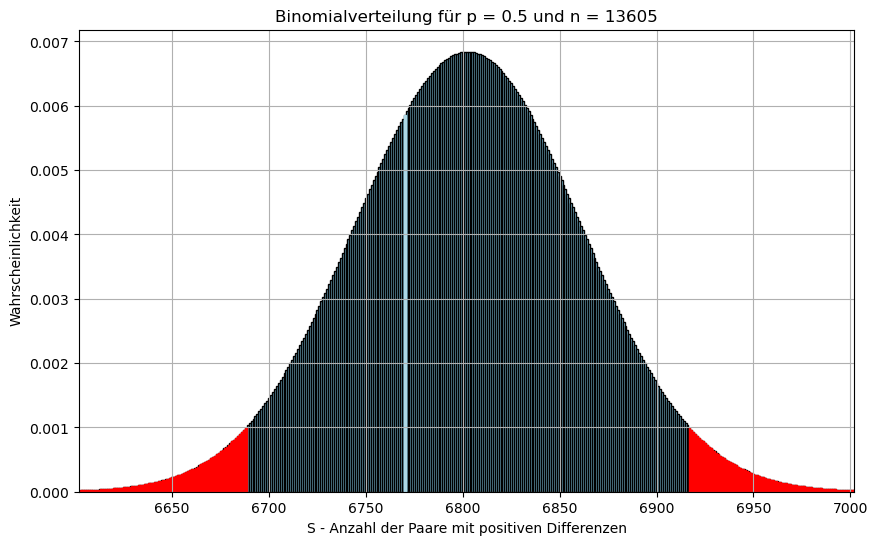

In [22]:
# Plot des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(x, binom_dist, width=1.0, color='skyblue', edgecolor='black')

print(len(binom_dist))

# Den Ablehnungsbereich rot markieren
plt.bar(x[0:6689], binom_dist[0:6689], width=0.8, color='red', edgecolor='red')
plt.bar(x[6917:13606], binom_dist[6917:13606], width=0.8, color='red', edgecolor='red')

# Den Balken bei Index 6770 blau markieren
plt.bar(x[6770], binom_dist[6770], width=1.0, color='lightblue', edgecolor='lightblue')


plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')

# Wir zoomen auf den mittleren Bereich des Plots, da die Wahrscheinlichkeiten
# weiter ausserhalb aufgrund der sehr großen Datenmengen sehr schnell sehr klein werden.
# Die folgende Zeile auskommentieren um den gesamten Plot zu sehen:
plt.xlim(n//2 - 200, n//2 + 200)

# Mit der folgenden Zeile kann man den angezeigten Bereich der Y-Achse festlegen
#plt.ylim(0, 0.00000025)

plt.grid(True)
plt.show()

Unser Ablehnungsbereich ist im obigen Plot nun rot markiert. Wenn wir beim Auszählen der positiven Differenzen ein $S$ erhalten hätten, das in in diesen Bereich fällt, dann hätten wir die Nullhypothese verwerfen und unsere Alternativhypothese annehmen können.
Unser $S=6770$ ist im Plot hellblau markiert und liegt nicht im Ablehnungsbereich, d. h. wir können aufgrund unserer Datenlage die Alternativhypothese nicht annehmen und müssen weiter mit Nullhypothese arbeiten. 